<a href="https://colab.research.google.com/github/abhijeet0717/College-academics/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import tree

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving antfile17.csv to antfile17.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['antfile17.csv']))

ID3 Model (Entropy) Accuracy:  0.7767857142857143
ID3 Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       166
           1       0.57      0.53      0.55        58

    accuracy                           0.78       224
   macro avg       0.71      0.70      0.70       224
weighted avg       0.77      0.78      0.77       224

CART Model (Gini) Accuracy:  0.7767857142857143
CART Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       166
           1       0.58      0.52      0.55        58

    accuracy                           0.78       224
   macro avg       0.71      0.69      0.70       224
weighted avg       0.77      0.78      0.77       224



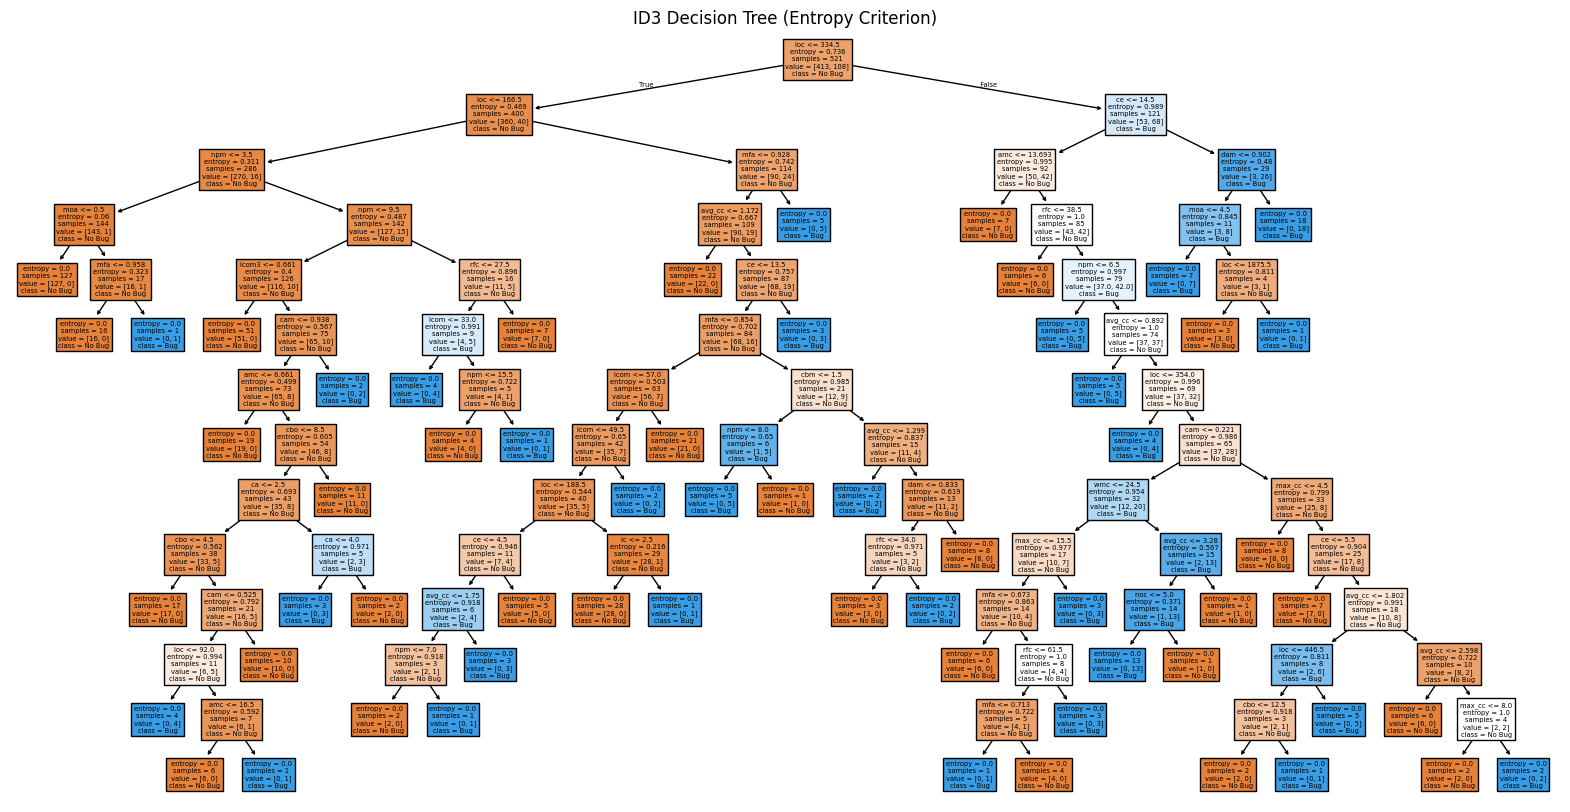

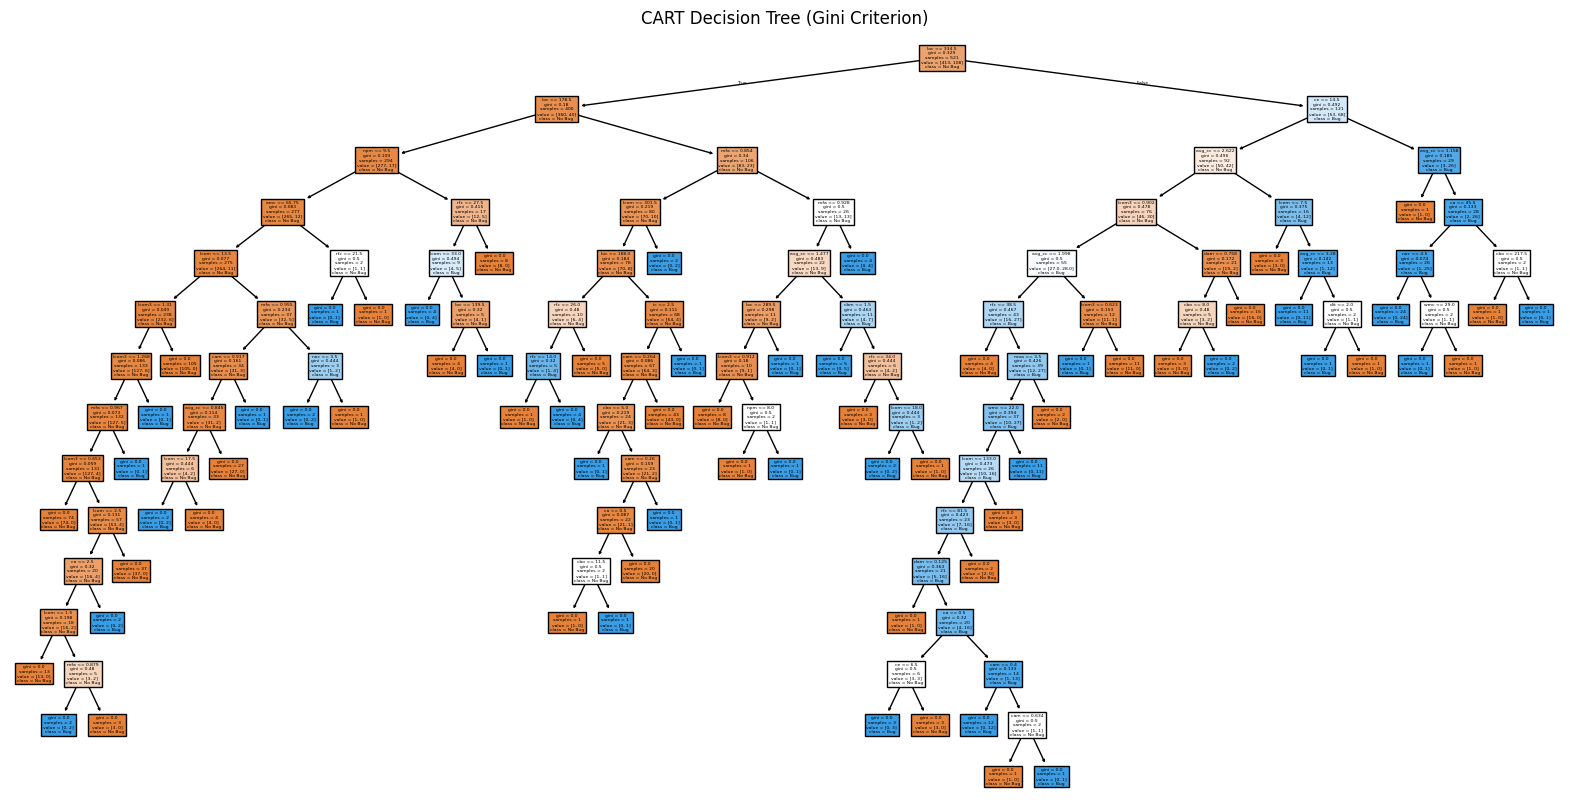

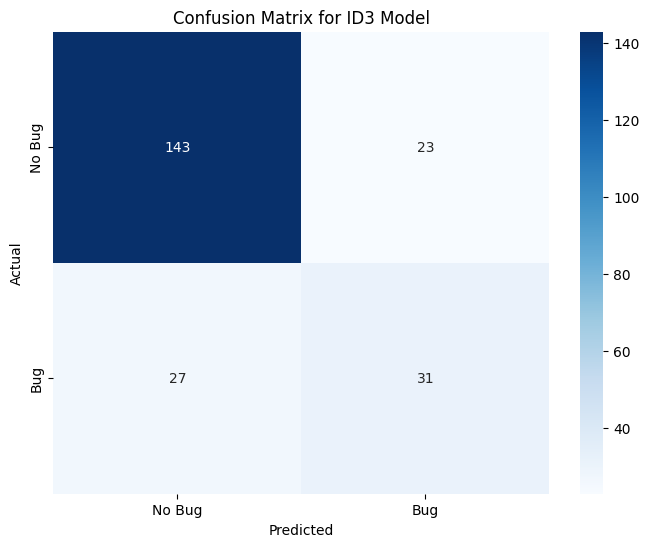

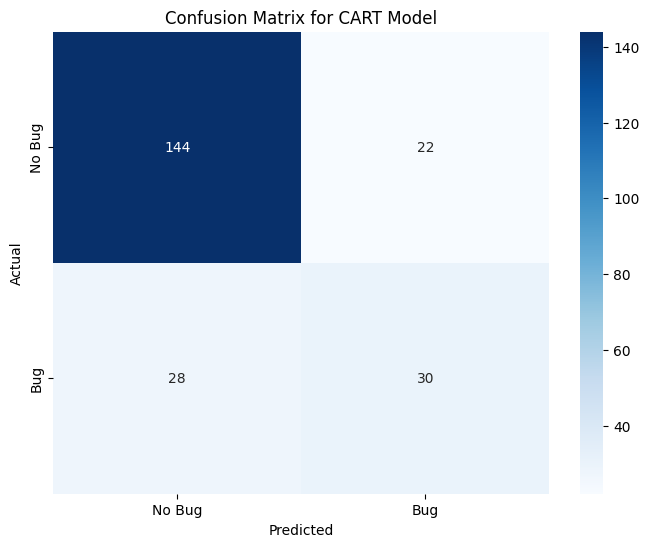

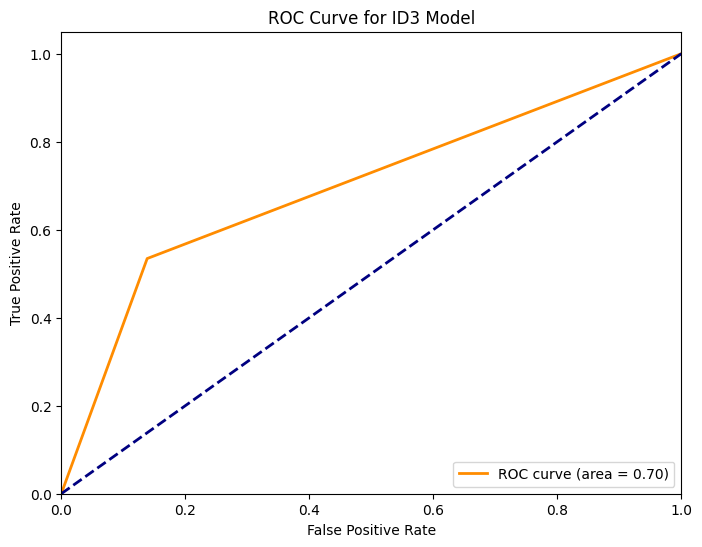

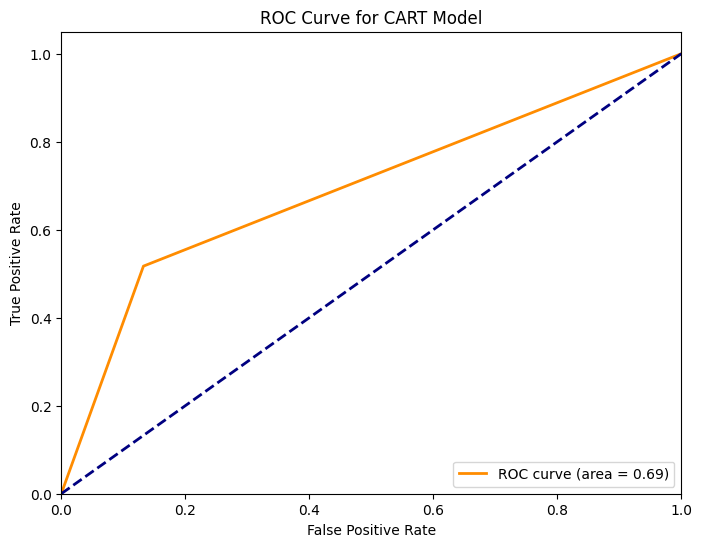

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['bug'])
y = data['bug']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ID3 algorithm using 'entropy' criterion
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)
# CART algorithm using 'gini' criterion (default)
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)
# Predictions for both models
id3_pred = id3_model.predict(X_test)
cart_pred = cart_model.predict(X_test)
# Evaluate the models
id3_accuracy = accuracy_score(y_test, id3_pred)
cart_accuracy = accuracy_score(y_test, cart_pred)
id3_report = classification_report(y_test, id3_pred)
cart_report = classification_report(y_test, cart_pred)
# Print results
print("ID3 Model (Entropy) Accuracy: ", id3_accuracy)
print("ID3 Model Classification Report:\n", id3_report)
print("CART Model (Gini) Accuracy: ", cart_accuracy)
print("CART Model Classification Report:\n", cart_report)
# Function to plot the decision tree
def plot_decision_tree(model, feature_names, title):
   plt.figure(figsize=(20, 10))
   tree.plot_tree(model, filled=True, feature_names=feature_names, class_names=['No Bug', 'Bug'])
   plt.title(title)
   plt.show()
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bug', 'Bug'], yticklabels=['No Bug', 'Bug'])
   plt.title(title)
   plt.ylabel('Actual')
   plt.xlabel('Predicted')
   plt.show()
# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, title):
   fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
   roc_auc = auc(fpr, tpr)
   plt.figure(figsize=(8, 6))
   plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title)
   plt.legend(loc="lower right")
   plt.show()
# Plotting decision trees for ID3 and CART models
plot_decision_tree(id3_model, X.columns, "ID3 Decision Tree (Entropy Criterion)")
plot_decision_tree(cart_model, X.columns, "CART Decision Tree (Gini Criterion)")
# Plot confusion matrices
plot_confusion_matrix(y_test, id3_pred, "Confusion Matrix for ID3 Model")
plot_confusion_matrix(y_test, cart_pred, "Confusion Matrix for CART Model")
# Plot ROC curves for both models
id3_pred_prob = id3_model.predict_proba(X_test)[:, 1]
cart_pred_prob = cart_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, id3_pred_prob, "ROC Curve for ID3 Model")
plot_roc_curve(y_test, cart_pred_prob, "ROC Curve for CART Model")